# **Asignatura**: Aprendizaje Automático

### Nombre completo: <mark>Mirko Speciale</mark>




# *IA generativa con Autoencoders*

En este ejercicio los alumnos se enfrentarán a un problema utilizando autoencoders, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema  de **Inteligencia Artificial Generativa** haciendo uso de técnicas de Deep Learning para tratar de generar imágenes que contienen dígitos manuscritos.

## Contexto del problema

La **IA generativa** es un tipo de Inteligencia Artificial que se centra en crear contenido nuevo y original. Esto puede incluir texto, imágenes, música, vídeo, etc. A diferencia de otros tipos de IA que se enfocan en analizar o clasificar datos, la IA generativa utiliza modelos complejos para aprender patrones y características de los datos existentes y luego generar algo nuevo basado en ese aprendizaje.

Un ejemplo popular de IA generativa son los modelos de lenguaje, como **ChatGPT**. Estos modelos pueden escribir historias, responder preguntas o incluso mantener una conversación, todo basado en la información con la que fueron entrenados.

La IA generativa también se utiliza en el arte, donde puede crear obras visuales sorprendentes, o en la música, donde puede componer melodías. Sin embargo, es importante tener en cuenta que, aunque puede producir resultados impresionantes, la calidad y la relevancia del contenido generado pueden variar.

<center>
<img src="https://bernardmarr.com/wp-content/uploads/2024/02/13-Ways-Writers-Should-Embrace-Generative-AI.webp" />
</center>

En esta práctica **vamos a hacer uso de autoencoders** para aprender las características de dígitos manuscritos, de modo que podamos utilizar el modelo entrenado **para generar nuevos dígitos previamente inexistentes**.

En particular, el modelo que deseamos construir constará de dos partes:

- Un **encoder**, capaz de obtener una imagen de entrada conteniendo un dígito manuscrito y dar como salida su *embedding*.
- Un **decoder**, cada de generar una imagen a partir de un *embedding*.


## El conjunto de datos

Utilizaremos el conjunto de datos de Digits MNIST incluido en TensorFlow, el cual se puede cargar utilizando el código de la siguiente celda:

In [ ]:
import tensorflow as tf

train, test= tf.keras.datasets.mnist.load_data()
XTrain, YTrain= train
XTest, YTest= test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Construcción de **tres modelos**:
    1. **Encoder**, para codificar datos de entrada en *embeddings*.
    2. **Decoder**, para decodificar *embeddings*.
    3. **Autoencoder**, formado como la concatenación secuencial del **Encoder** y el **Decoder**
5. Selección y estimación de valores para hiperparámetros.
6. Validación del modelo. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, usaremos la siguiente estructura para el **Encoder**:


<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 32 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 14x14 | 7x7 </td>
  <td> - </td>
</tr>
</table>


El **Decoder** deberá *deshacer* la codificación realizada por el **Encoder**, por lo que estableceremos una arquitectura de capas simétrica al primer módulo:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 7x7 | 14x14 </td>
  <td> 16 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 16 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 14x14 | 28x28 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 32 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 1 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
</table>


**Entrene el autoencoder un total de 50 épocas con tamaño de batch 1000. Use una función de pérdida habitual para resolución de problemas de regresión**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>


Cuando el modelo **autoencoder** ya esté entrenado, además de su validación con el conjunto de test, realice las siguientes pruebas:

- **Usando sólo el encoder**:
   1. Seleccione todas las imágenes de un mismo dígito (por ejemplo, el dígito 0).
   2. Envíe esas imágenes como entrada al encoder, y obtenga los resultados de los embeddings.
   3. Calcule un **embedding promedio** calculando la media de cada componente de todos los embeddings.

- **Usando sólo el decoder**:
   4. Proporcione este nuevo **embedding promedio** como entrada al **Decoder**. ¿Qué se obtiene? ¿Es lógico el resultado?


- Realice los pasos anteriores del **Encoder** con todos los dígitos pero, en este caso, guarde el valor promedio y de desviación estándar (a este último lo denominaremos **embedding de desviación**.
- Genere, para cada dígito, varios **nuevos embeddings** simulando un muestreo desde una distribución normal de media el embedding promedio y desviación típica el embedding de desviación.
- Utilice los **embeddings nuevos** como entrada al módulo **Decoder**. ¿Qué se obtiene?
- Analice y discuta los resultados obtenidos.



Pasamos ahora al segundo problema, en el que me ocuparé de la inteligencia artificial generativa. Ahora el objetivo es analizar un conjunto de datos en el que encontramos imágenes de una serie de números manuscritos y tengo que crear un modelo capaz de comprenderlos y reconstruirlos simulando la creatividad humana.

Por tanto, construiré un codificador, que comprima las imágenes en representaciones compactas, por tanto un embedding, y un decodificador, que reconstruya o genere imágenes a partir de estas representaciones.

Finalmente, evaluaré y analizaré estos resultados con métricas, para ver así si las imágenes generadas son nítidas y reconocibles, o si el autocodificador tiende a almacenar datos en lugar de generalizar.

Vamos a la primera parte del código, aquí simplemente se preparan los datos y empiezo normalizandolos. Las imágenes originales tienen píxeles con valores entre 0 y 255, así que hago una simple división por 255 y convierto los datos a una escala entre 0 y 1. Esto mejora la estabilidad y la velocidad de convergencia del modelo.

Las imágenes tienen un formato de 28x28 pero necesito añadir una dimensión, que establezco en 1 ya que tengo imágenes en blanco y negro. Necesito esto ya que se requiere más tarde para las capas convolucionales.

Ahora divido el conjunto de datos original de 60000 imágenes en un conjunto de entrenamiento y un conjunto de validación. Más concretamente, este último constituirá el 10% y, por tanto, tendrá un total de 6000 imágenes y el conjunto de entrenamiento 54000. En cuanto al conjunto de prueba, éste ya se origina por separado y cuenta con un total de 10000 imágenes.

Una vez terminada esta primera fase de preprocesamiento, imprimo los resultados

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Normalización y reshape
XTrain = XTrain.astype('float32') / 255.
XTest  = XTest.astype('float32')  / 255.
XTrain = np.expand_dims(XTrain, -1)
XTest  = np.expand_dims(XTest, -1)

# División para entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(XTrain, XTrain, test_size=0.1, random_state=42)
# Mantenemos el conjunto de prueba separado
X_test, y_test = XTest, XTest

print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")

Entrenamiento: (54000, 28, 28, 1), Validación: (6000, 28, 28, 1), Prueba: (10000, 28, 28, 1)


En este bloque de código construyo las piezas fundamentales de todo el proyecto. Inicialmente construyo un codificador que tiene la tarea de comprimir una imagen de 28x28 en un embedding de tamaño latent_dim que luego definiré con una búsqueda de hiperparámetros.

Por tanto, las imágenes de entrada llegan con el formato explicado anteriormente, luego se construye un primer bloque convolucional que aplica 64 filtros convolucionales 3x3, manteniendo las dimensiones espaciales y añadiendo no linealidad con ReLU. Este primer bloque es más general y me permite detectar contornos y transiciones de intensidad, luego es el turno de un segundo bloque convolucional que se reduce a 32 canales, pudiendo extraer patrones y formas más complejas.



Le sigue una reducción espacial a 14x14 con maxpoling, según la arquitectura, antes de un tercer bloque convolucional que reduce aún más a 16 canales. La arquitectura preestablecida prevé ahora un nuevo maxpoling que lleva las dimensiones a 7x7 y para concluir, como es habitual, se aplica un aplanamiento de los datos en un vector y se proyectan en un espacio latente de dimensión latent_dim, que será la «huella» esencial de la imagen, reducida a algunas decenas de valores.
Pasamos ahora al descodificador, que toma el pequeño vector numérico producido por el codificador y lo «desenrolla» para reconstruir una imagen. En un primer momento, ese vector, que contiene toda la información esencial pero en forma comprimida, se transforma, mediante una capa densa, en un conjunto de valores del mismo tamaño que tenía el codificador antes de aplanar los datos, restaurando así una estructura espacial mínima. A continuación, gracias a dos pasos sucesivos de ampliación, cada uno de los cuales duplica la anchura y la altura de la imagen de baja resolución, el descodificador devuelve gradualmente la imagen a su tamaño original de 28×28 píxeles. En cada uno de estos pasos de ampliación, una operación de convolución añade los detalles que faltan, como si dibujara contornos y sombreara zonas que antes estaban contorneadas. Por último, un filtro final aplica la función sigmoidea a cada punto de la imagen, convirtiendo esos valores en números entre cero y uno, para devolver un mapa de intensidad coherente con los niveles de gris originales. De este modo, el descodificador traduce el lenguaje abstracto del vector latente en píxeles visibles, intentando recrear fielmente la imagen de origen.

In [ ]:
from tensorflow.keras import layers, Model, Input

def build_encoder(latent_dim, input_shape=(28,28,1)):
    inp = Input(shape=input_shape)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(inp)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    z = layers.Dense(latent_dim, activation=None)(x)
    return Model(inp, z, name='Encoder')


def build_decoder(latent_dim, output_shape=(28,28,1)):
    latent = Input(shape=(latent_dim,))
    x = layers.Dense(7*7*16, activation='relu')(latent)
    x = layers.Reshape((7,7,16))(x)
    x = layers.UpSampling2D(2)(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    out = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    return Model(latent, out, name='Decoder')

Con este bloque, quiero introducir el PSNR, una métrica para evaluar la calidad de las imágenes reconstruidas por el autocodificador para cuantificar lo cerca que una imagen reconstruida se acerca a la original, tanto numérica como visualmente. Su fórmula se basa en la relación entre el valor máximo posible de un píxel, que en mi caso es 1,0, ya que los datos están normalizados entre 0 y 1, y el error cuadrático medio (MSE) entre la imagen original y la reconstruida. Matemáticamente, se define como
$PSNR = 10 \cdot \log_{10} \left( \frac{MAX^2}{MSE} \right)$



En este contexto, el parámetro MAX se establece en 1,0, y el MSE es calculado automáticamente por TensorFlow mediante la función tf.image.psnr. El uso del logaritmo transforma el error en una escala logarítmica expresada en decibelios, haciendo más intuitiva la interpretación de los resultados. Por ejemplo, un PSNR de 30 dB indica una discrepancia visible pero aceptable, mientras que valores superiores a 40 dB sugieren una reconstrucción casi perfecta.



En el proyecto, la PSNR flanqueará al MSE y al MAE (Error Absoluto Medio) para proporcionar una evaluación multidimensional del rendimiento del modelo. Mientras que el MSE es la principal función de pérdida que penaliza los errores cuadráticos, orientando la optimización durante el entrenamiento, el MAE ofrece una perspectiva complementaria

In [ ]:
import tensorflow as tf

def psnr_m(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

Pasamos a la búsqueda de los mejores hiperparámetros. Habiendo fijado el tamaño del lote en 1000, busco los mejores valores para las variables de tamaño del espacio latente y tasa de aprendizaje. Quiero encontrar combinaciones que maximicen la PSNR en el conjunto de validación y lo haré utilizando un entrenamiento corto de 10 épocas para reducir el tiempo de cálculo. A continuación, la rejilla probará cuatro combinaciones utilizando dos ciclos anidados, con dos valores para el tamaño latente 32 y 64 respectivamente y dos para la tasa de aprendizaje 0,001 y 0,0001 respectivamente. Para cada configuración, el código construye un autoencoder, lo entrena y evalúa su rendimiento registrando la pérdida en el conjunto de entrenamiento, la PSNR y la MAE en el conjunto de validación.
En la salida podemos observar que la configuración con latent_dim=64 y learning_rate=0.001 obtiene la PSNR más alta de 21.70 dB.

Este resultado indica que un espacio latente mayor permite al modelo captar mejor las características de la imagen, mientras que una tasa de aprendizaje elevada favorece una convergencia más rápida y eficaz. Por el contrario, una tasa de aprendizaje demasiado baja, así como 0,0001, empeora significativamente el rendimiento; de hecho, con latent_dim=64, la PSNR cae a 17,38 dB, lo que sugiere que, en sólo 10 epochs, el modelo no consigue optimizar adecuadamente los pesos.

En la salida podemos observar que la configuración con latent_dim=64 y learning_rate=0.001 obtiene la PSNR más alta de 21.70 dB.

Este resultado indica que un espacio latente mayor permite al modelo captar mejor las características de la imagen, mientras que una tasa de aprendizaje elevada favorece una convergencia más rápida y eficaz. Por el contrario, una tasa de aprendizaje demasiado baja, así como 0,0001, empeora significativamente el rendimiento; de hecho, con latent_dim=64, la PSNR cae a 17,38 dB, lo que sugiere que, en sólo 10 epochs, el modelo no consigue optimizar adecuadamente los pesos.

En el gráfico que he creado, estas tendencias son más evidentes e inmediatas. Aquí vemos en el eje x las cuatro configuraciones, mientras que el eje y muestra los valores de PSNR en decibelios. La línea muestra un pico para la combinación latent_dim=64, learning_rate=0,001, seguido de un marcado descenso para las configuraciones con learning_rate 0,0001. La diferencia entre latent_dim=32 y latent_dim=64 es constante, de hecho, a la misma tasa de aprendizaje, un espacio latente mayor siempre produce mejores resultados, lo que confirma que una mayor capacidad de representación es fundamental para la calidad de las reconstrucciones.

ld=32, lr=0.001 -> loss=0.0090, psnr=21.24, mae=0.0316
ld=32, lr=0.0001 -> loss=0.0266, psnr=16.15, mae=0.0688
ld=64, lr=0.001 -> loss=0.0081, psnr=21.70, mae=0.0296
ld=64, lr=0.0001 -> loss=0.0206, psnr=17.38, mae=0.0564
Resultados de la búsqueda en la cuadrícula:
   latent_dim  learning_rate  batch_size  train_loss   val_psnr   val_mae
0          32         0.0010        1000    0.009033  21.244093  0.031638
1          32         0.0001        1000    0.026643  16.153366  0.068793
2          64         0.0010        1000    0.008085  21.695375  0.029583
3          64         0.0001        1000    0.020648  17.382217  0.056416


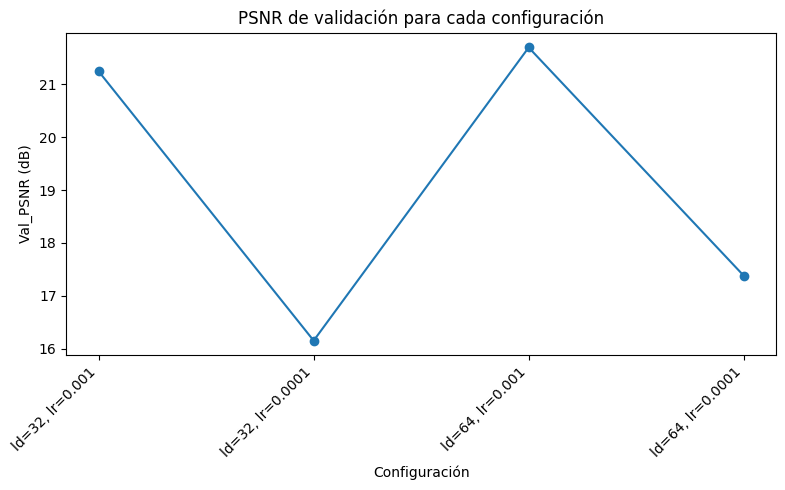

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Input as KInput, Model as KModel
import tensorflow as tf

# Parámetros fijos
BATCH_SIZE = 1000

# Grid de solo parámetros variables
param_grid = {
    'latent_dim': [32, 64],
    'learning_rate': [1e-3, 1e-4]
}
results = []

# Búsqueda en la cuadrícula
for ld in param_grid['latent_dim']:
    for lr in param_grid['learning_rate']:
        # Construcción y compilación
        encoder = build_encoder(ld)
        decoder = build_decoder(ld)
        inp = KInput(shape=(28, 28, 1))
        out = decoder(encoder(inp))
        ae = KModel(inp, out)
        ae.compile(
            optimizer=tf.keras.optimizers.Adam(lr),
            loss='mse',  # Función de pérdida para regresión
            metrics=[psnr_m, 'mae']
        )
        # Entrenamiento breve
        history = ae.fit(
            X_train, X_train,
            epochs=10,
            batch_size=BATCH_SIZE,
            validation_data=(X_val, X_val),
            verbose=0
        )
        # Recopilar resultados
        results.append({
            'latent_dim': ld,
            'learning_rate': lr,
            'batch_size': BATCH_SIZE,
            'train_loss': history.history['loss'][-1],
            'val_psnr': history.history['psnr_m'][-1],
            'val_mae': history.history['mae'][-1]
        })
        print(f"ld={ld}, lr={lr} -> loss={history.history['loss'][-1]:.4f}, psnr={history.history['psnr_m'][-1]:.2f}, mae={history.history['mae'][-1]:.4f}")

# Convertir los resultados en DataFrame
df_results = pd.DataFrame(results)
print("Resultados de la búsqueda en la cuadrícula:")
print(df_results)

# Gráfico PSNR
plt.figure(figsize=(8,5))
df_results['config'] = (
    'ld='+df_results['latent_dim'].astype(str) +
    ', lr='+df_results['learning_rate'].astype(str)
)
plt.plot(df_results['config'], df_results['val_psnr'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Configuración')
plt.ylabel('Val_PSNR (dB)')
plt.title('PSNR de validación para cada configuración')
plt.tight_layout()
plt.show()

Una vez hallados los hiperparámetros, podemos llegar a la parte final del problema. Aquí el código comienza seleccionando los mejores hiperparámetros basándose en el valor máximo de PSNR en el conjunto de validación, que recordamos que es {'latent_dim': 64, 'learning_rate': 0.001, 'batch_size': 1000}. A continuación, se construyen los nuevos codificador y decodificador con los hiperparámetros mejor encontrados y el optimizador Adam.
En este punto, todo está listo para comenzar el entrenamiento en un conjunto de datos combinado de entrenamiento y validación, para aprovechar al máximo los datos disponibles. Durante las 50 épocas de entrenamiento establecidas por la arquitectura, se observa una mejora gradual y constante de las métricas, donde la pérdida inicial de 0,1247 se reduce a 0,0033, la PSNR pasa de 9,635 dB a 25,55 dB, y el MAE cae de 0,2394 a 0,0178. Estos valores indican que el modelo no sólo reduce el error cuadrático medio, sino que también mejora la fidelidad visual de las reconstrucciones, sin mostrar signos de sobreajuste.

Al final del entrenamiento, el modelo se evalúa en el conjunto de prueba, que recordemos consta de 10.000 imágenes que nunca se utilizaron durante el entrenamiento. Las métricas finales muestran una pérdida de 0,0032, una PSNR de 25,69 dB y un MAE de 0,0175, y confirman que el modelo se generaliza eficazmente en datos no vistos. También observamos una PSNR especialmente alta, lo que sugiere que las reconstrucciones son visualmente muy parecidas a los originales, mientras que el bajo MAE indica un error medio por píxel insignificante.
Los resultados son muy alentadores y estoy satisfecho con el trabajo realizado

In [ ]:
from tensorflow.keras import Input as KInput, Model as KModel

# Elección de la mejor combinación basada en PSNR máximo
best = max(results, key=lambda r: r['val_psnr'])
print('Mejores hiperparámetros:', best)

# Entrenamiento final en train+val
encoder = build_encoder(best['latent_dim'])
decoder = build_decoder(best['latent_dim'])
inp = KInput(shape=(28,28,1))
ae = KModel(inp, decoder(encoder(inp)))
ae.compile(
    optimizer=tf.keras.optimizers.Adam(best['learning_rate']),
    loss='mse',
    metrics=[psnr_m, 'mae']
)
ae.fit(
    np.concatenate([X_train, X_val]),
    np.concatenate([X_train, X_val]),
    epochs=50,
    batch_size=best['batch_size'],
    verbose=1
)

# Evaluación en el conjunto de prueba
final_metrics = ae.evaluate(X_test, X_test)
print('Pérdida de prueba, PSNR y MAE:', final_metrics)

Mejores hiperparámetros: {'latent_dim': 64, 'learning_rate': 0.001, 'batch_size': 1000, 'train_loss': 0.008085442706942558, 'val_psnr': 21.695375442504883, 'val_mae': 0.029582832008600235}
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.1247 - mae: 0.2394 - psnr_m: 9.6351
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0533 - mae: 0.1226 - psnr_m: 13.0064
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0228 - mae: 0.0597 - psnr_m: 16.9828
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0149 - mae: 0.0439 - psnr_m: 18.9651
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0118 - mae: 0.0375 - psnr_m: 20.0209
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0100 - mae: 0.0338 - psnr_m: 20.7432
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0089 - mae: 0.0314 - psnr_m: 21.2648
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0081 - mae: 0.0296 - psnr_m: 21.6862
Epoch 9/50
60/60 ━━━━━━━

Finalmente hemos llegado al final del código donde demuestro cómo el autoencoder, una vez entrenado, puede ser utilizado para generar nuevas imágenes de dígitos explotando las propiedades del espacio latente. Así, en un primer paso, para cada dígito del 0 al 9, se seleccionan todas las imágenes del conjunto de entrenamiento que pertenecen a esa clase. Estas imágenes son procesadas por el codificador, que las transforma en embeddings latentes y, para cada clase, se calcula el embedding medio, es decir, la media de todos los embeddings de las imágenes de los dígitos, y la desviación estándar, registrando así la distribución estadística de las representaciones latentes.

En este punto entra en juego el descodificador, al que se le pasa el embedding medio de cada dígito para generar una imagen, y vemos cómo en la salida para el dígito 0, el embedding medio produce una reconstrucción que representa una versión «ideal» o «media» del 0 en el conjunto de datos. Vemos un 0 nítido, libre de las variaciones individuales presentes en los ejemplos individuales del conjunto de datos, casi una síntesis de las características comunes a todos los 0 del conjunto de entrenamiento. Esto se hace para todos los números del 0 al 9.
En un paso posterior, se explota la desviación estándar de los embeddings para generar nuevas imágenes. Mediante el muestreo de puntos del espacio latente de acuerdo con una distribución normal centrada en el embedding medio y con una dispersión igual a la desviación estándar calculada, el descodificador es capaz de producir variaciones del dígito original. Vemos pues, volviendo al caso del 0, que este proceso genera imágenes que mantienen la forma general del dígito pero introducen ligeras diferencias en el grosor del trazo, la inclinación o la proporción, simulando la variabilidad natural de la escritura manuscrita... En la práctica, el resultado es poco humano, pero la idea se reproduce muy bien y las imágenes son perfectamente reconocibles. Vemos, pues, que el modelo ha comprendido y resuelto perfectamente el problema. Los resultados son más que satisfactorios y puedo terminar aquí la resolución.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


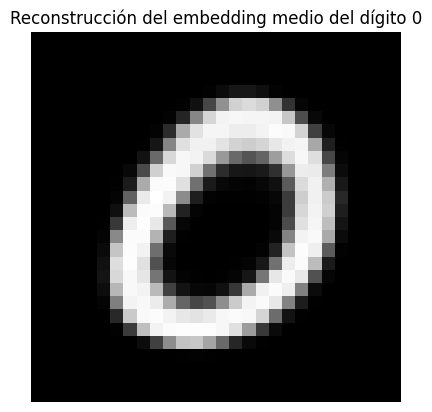

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


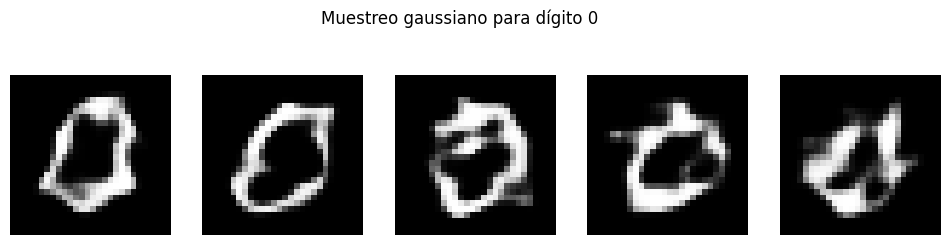

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


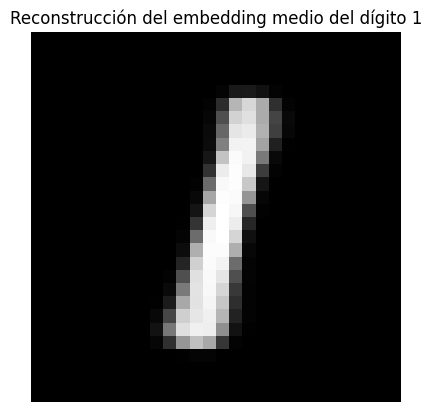

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


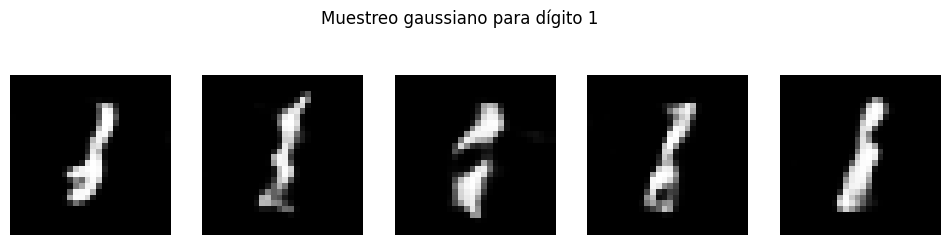

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


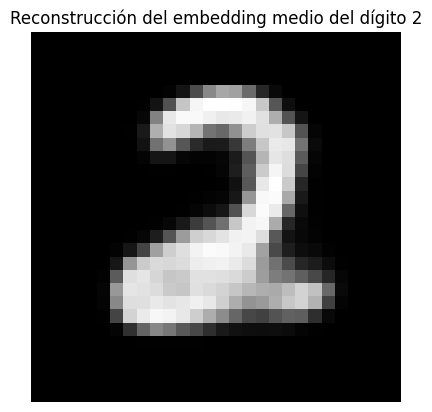

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


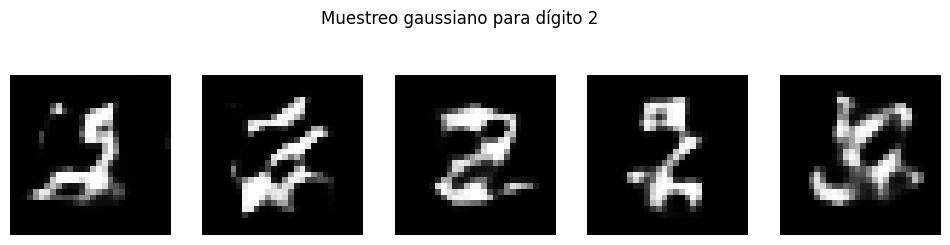

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


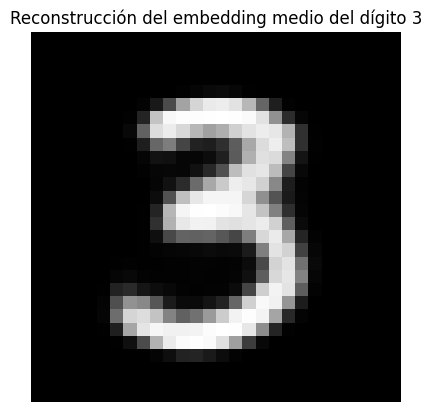

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


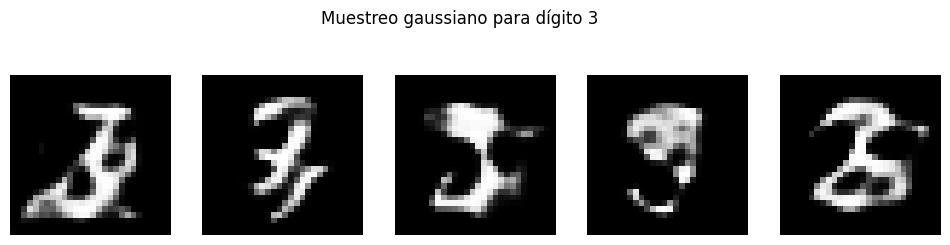

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


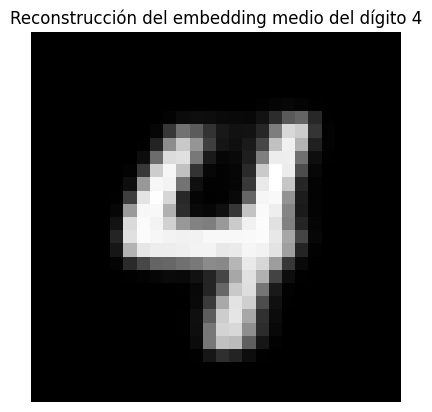

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


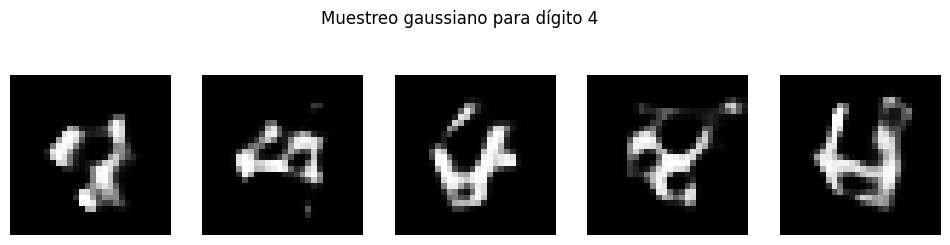

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


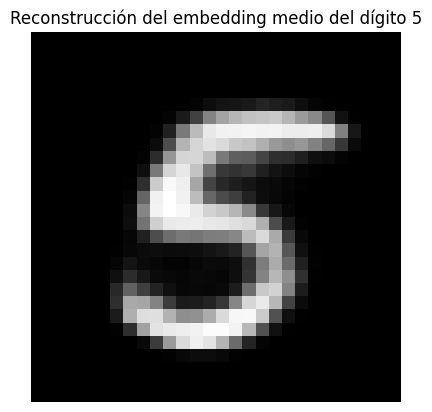

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


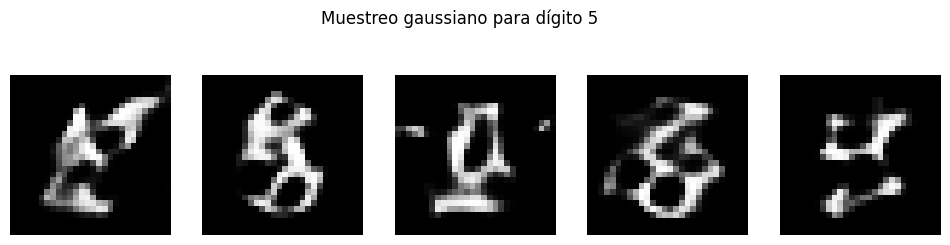

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


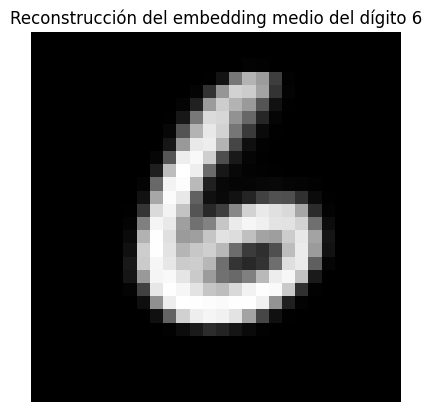

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


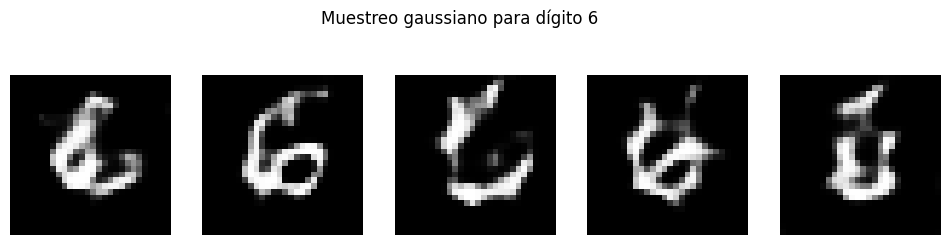

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


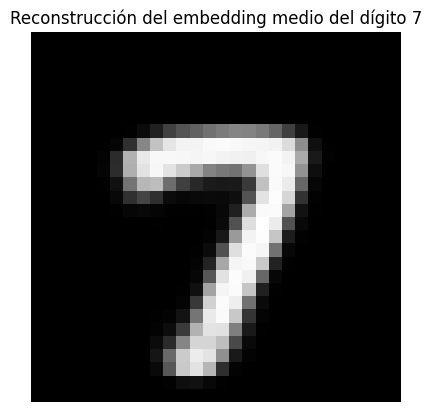

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


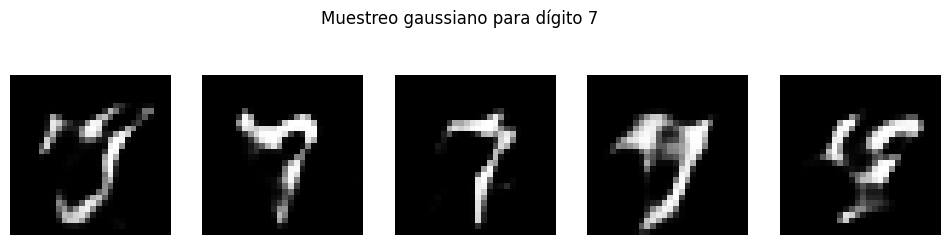

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


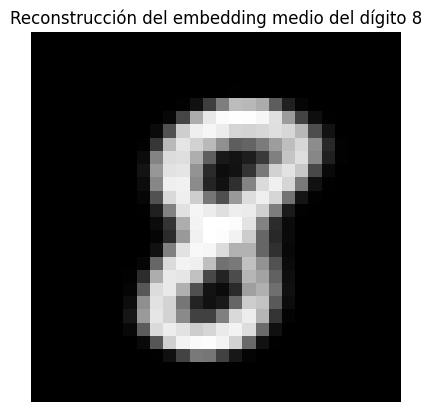

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


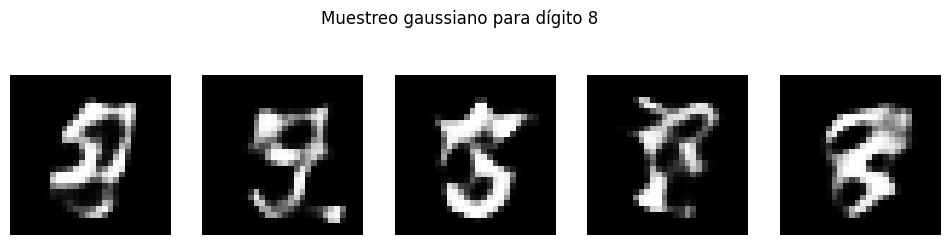

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


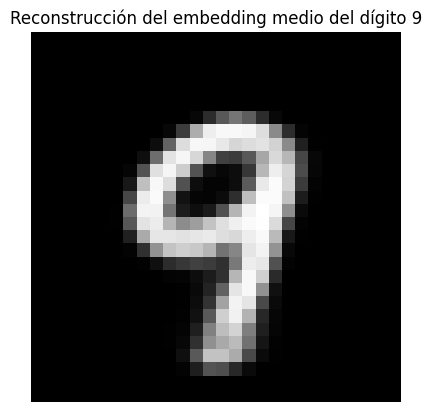

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


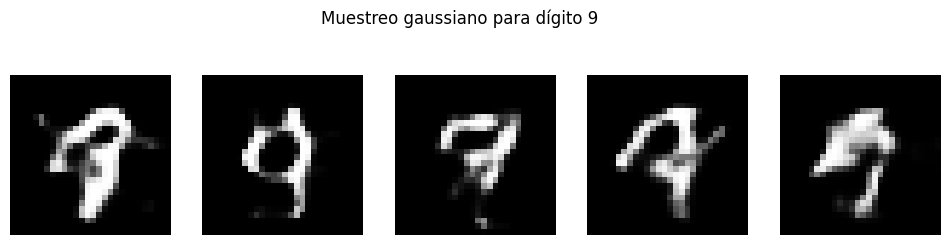

In [ ]:
import numpy as np

emb_means, emb_stds = {}, {}
for d in range(10):
    idx = np.where(YTrain == d)[0]
    imgs_d = XTrain[idx]
    embs = encoder.predict(imgs_d, verbose=0)
    emb_means[d] = embs.mean(axis=0)
    emb_stds[d] = embs.std(axis=0)

# 7.2 Decodificación del embedding medio de un dígito
for d in range(10):
    mean_emb = emb_means[d].reshape(1, -1)
    generated = decoder.predict(mean_emb)
    plt.figure()
    plt.title(f"Reconstrucción del embedding medio del dígito {d}")
    plt.imshow(generated[0].squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

    # Muestreo de distribución normal y generación
    n_samples = 5
    samples = np.random.normal(loc=emb_means[d], scale=emb_stds[d], size=(n_samples, best['latent_dim']))
    gen_imgs = decoder.predict(samples)

    plt.figure(figsize=(12, 3))
    for i in range(n_samples):
        ax = plt.subplot(1, n_samples, i+1)
        plt.imshow(gen_imgs[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Muestreo gaussiano para dígito {d}")
    plt.show()